In [1]:
%matplotlib inline
import pandas
import matplotlib
import matplotlib.pyplot as plt

DATA_FILE_PATH = 'NYPD_Complaint_Data_Current_YTD.csv'

# NYC Harasment Complaints Data Analysis

This notebook contains snippets that intend to dive into the [NYC Complaints data set](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-YTD/5uac-w243) and investigate trends of complaints about harasment (all records where PD_DESC ctonains the work HARASMENT).

In [14]:
fullData = pandas.read_csv(DATA_FILE_PATH, sep=',')
fullData['COUNT'] = 1
harassmentData = fullData[(fullData['PD_DESC'].str.contains("HARASSMENT")==True) & (fullData['CMPLNT_FR_DT'].str.contains("2016")==True)].sort_values(['CMPLNT_FR_DT'])
harassmentData['CMPLNT_FR_DT']  = pandas.to_datetime(harassmentData['CMPLNT_FR_DT'])
print(str(len(fullData)) + ' total records in ' + DATA_FILE_PATH)
print(str(len(harassmentData)) + ' contain the word HARASMENT in its description')
print('which is ' + str(int(len(harassmentData)/len(fullData)*100)) + '%')

361740 total records in NYPD_Complaint_Data_Current_YTD.csv
64753 contain the word HARASMENT in its description
which is 17%


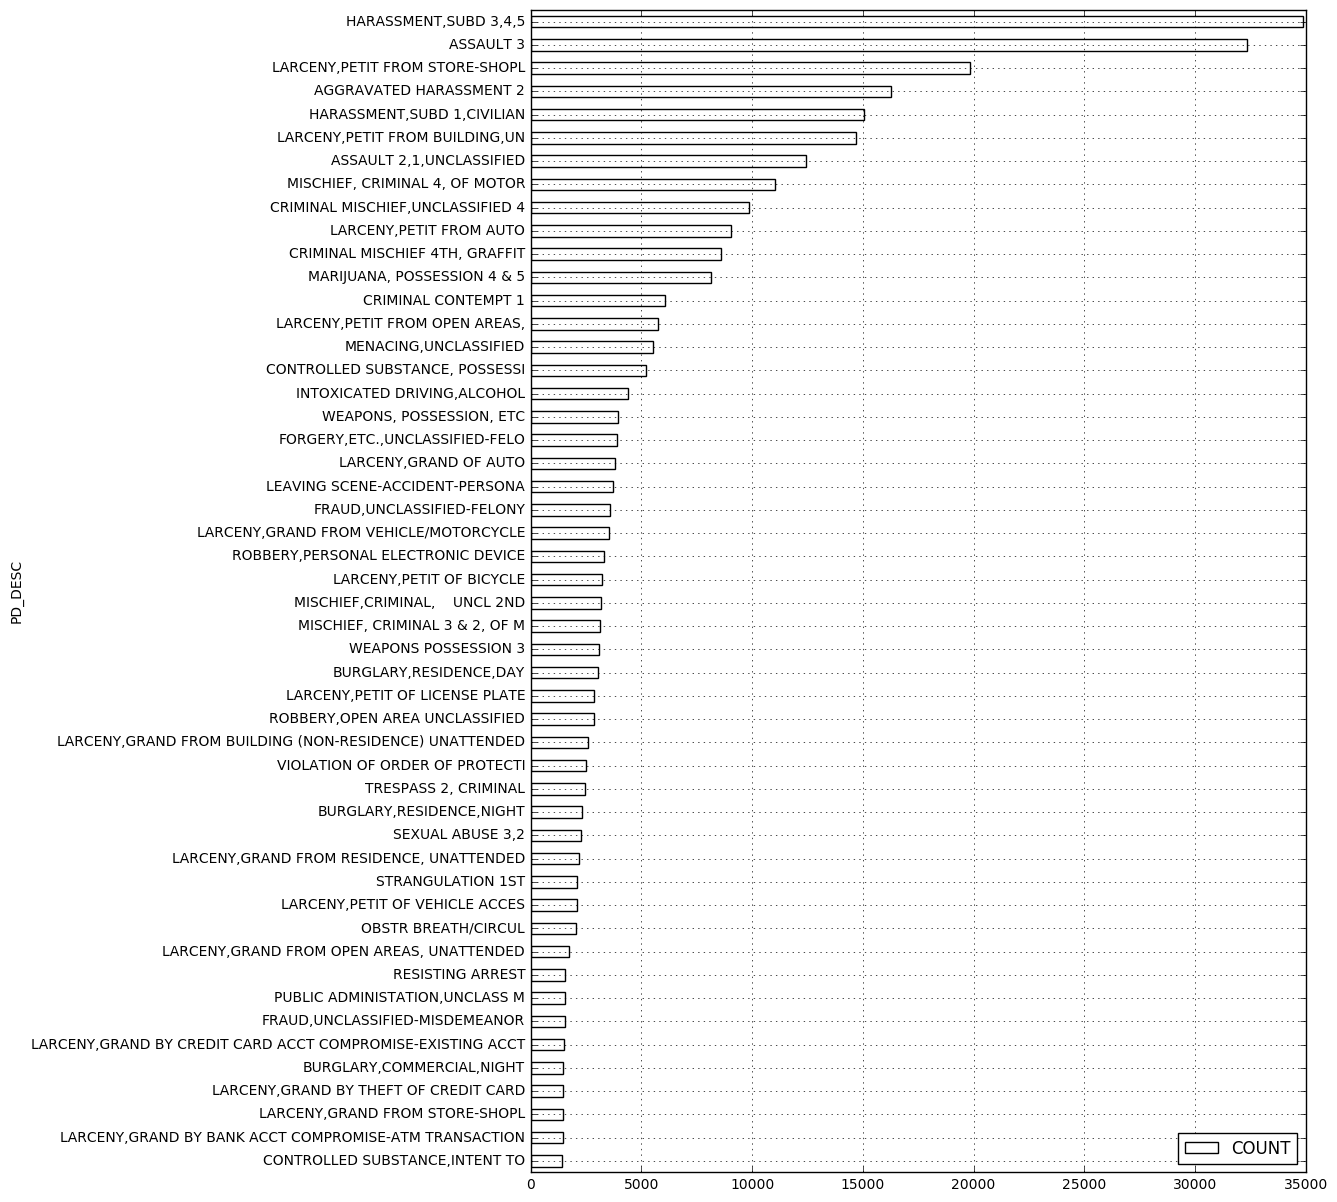

In [42]:
plt.rcParams["figure.figsize"] = [10,15]
harassmentDataTotals = pandas.DataFrame(fullData.groupby(['PD_DESC'])['COUNT'].sum())
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=False).head(50)
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=True)
harassmentDataTotals.plot.barh(facecolor='w');
plt.grid()

Displaying the sum of all complaint types of 2016 in the chart above, we can see that harasment complaints are the most common complaint.

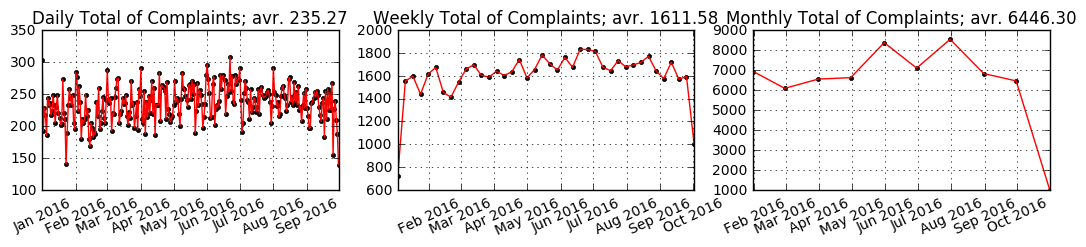

In [35]:
plt.rcParams["figure.figsize"] = [13,7]
harassmentDataTimeSeries = pandas.DataFrame(harassmentData.groupby(['CMPLNT_FR_DT','PREM_TYP_DESC'])['COUNT'].sum()).reset_index()
harassmentDataTimeSeries = harassmentDataTimeSeries.sort_values(['CMPLNT_FR_DT'])
monthlyHarassmentDataTimeSeries = harassmentDataTimeSeries.set_index('CMPLNT_FR_DT')

monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample("D").sum()
print()
plt.subplot(3, 3, 1)
plt.xticks(rotation=25)
plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
plt.title('Daily Total of Complaints; avr. ' + str('%.2f' % monthlyHarassmentDataTimeSeries.mean().COUNT))
plt.grid()

monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample("W").sum()
plt.subplot(3, 3, 2)
plt.xticks(rotation=25)
plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
plt.title('Weekly Total of Complaints; avr. ' + str('%.2f' % monthlyHarassmentDataTimeSeries.mean().COUNT))
plt.grid()

monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample("M").sum()
plt.subplot(3, 3, 3)
plt.xticks(rotation=25)
plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
plt.title('Monthly Total of Complaints; avr. ' + str('%.2f' % monthlyHarassmentDataTimeSeries.mean().COUNT))
plt.grid()

Looking at the daily, weekly and monthly trends and means, we can see that there are 235 harasment complaints each day on average, 1612 each week and 6446 every month. August has been the month with the most harasment complaints in 2016 so far.

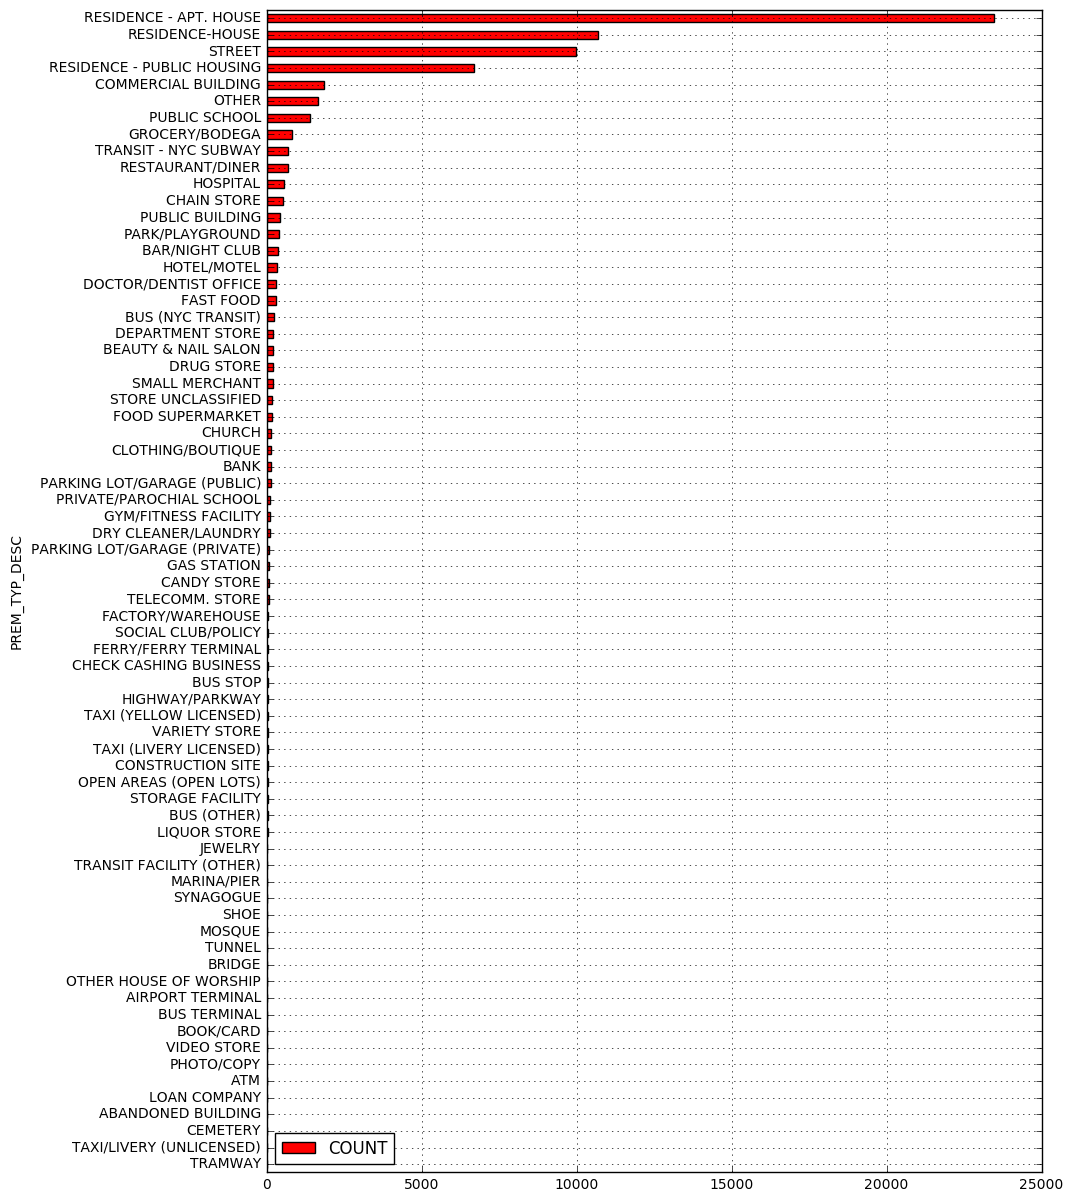

In [37]:
plt.rcParams["figure.figsize"] = [10,15]
harassmentDataTotals = pandas.DataFrame(harassmentData.groupby(['PREM_TYP_DESC'])['COUNT'].sum())
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=False)
descArr = harassmentDataTotals.reset_index()['PREM_TYP_DESC'].tolist()
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=True)
harassmentDataTotals.plot.barh(facecolor='r');
plt.grid()

Breaking harasment complaints down by their reported location, we can see that the vast majroity of harasment appears to happen within a residential house or apartment. "Street" is third most common location reported harasment appears to take place.

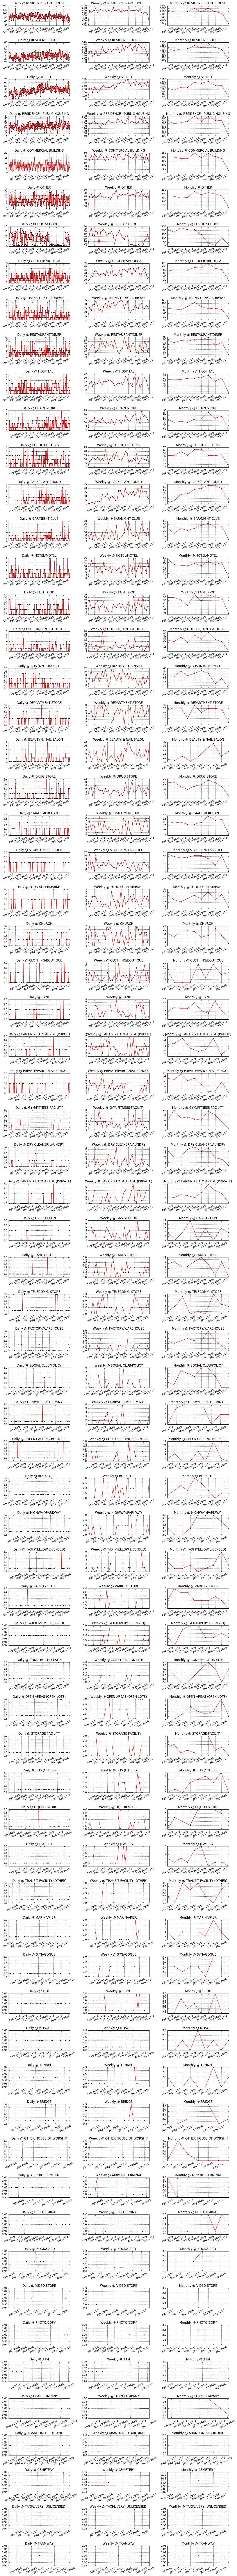

In [121]:
plt.rcParams["figure.figsize"] = [13,len(descArr)*2]

i = 1
for desc in descArr:
    tempDF = pandas.DataFrame(harassmentDataTimeSeries[(harassmentDataTimeSeries['PREM_TYP_DESC'] == desc)]) 
    tempDF = tempDF.set_index('CMPLNT_FR_DT')
    tempDF = tempDF.resample("D").sum()
    plt.subplot(len(descArr), 3, i)
    plt.tight_layout()
    plt.plot(tempDF, 'k.', tempDF, 'r-')
    plt.title('Daily @ ' + desc)
    plt.xticks(rotation=25)
    plt.grid()
    i+=1
    tempDF = tempDF.resample("W").sum()
    plt.subplot(len(descArr), 3, i)
    plt.plot(tempDF, 'k.', tempDF, 'r-')
    plt.title('Weekly @ ' + desc)
    plt.xticks(rotation=25)
    plt.grid()
    i+=1
    tempDF = tempDF.resample("M").sum()
    plt.subplot(len(descArr), 3, i)
    plt.plot(tempDF, 'k.', tempDF, 'r-')
    plt.title('Monthly @ ' + desc)
    plt.xticks(rotation=25)
    plt.grid()
    i+=1

Digging through the small multiples above that show the daily, weekly and monthly trend of harasment complaints for each location, we can identify a few trends: